<a href="https://www.kaggle.com/code/saadatkhalid/predicting-heart-disease-using-random-forest?scriptVersionId=127668828" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-cleveland-uci/heart_cleveland_upload.csv


### Description: In this project, we will be using the Random Forest algorithm to predict the presence of heart disease in patients based on their medical attributes.

## Tasks:
* Load and explore the dataset to get a better understanding of the data.
* Preprocess the data, including handling missing values and scaling features.
* Split the dataset into training and testing sets.
* Train a Random Forest classifier on the training set and evaluate its performance on the testing set.
* Tune the hyperparameters of the Random Forest algorithm using cross-validation to improve the model's performance.
* Visualize the important features that the Random Forest model has identified.

In [2]:
import pandas as pd

# Load and explore the dataset

In [3]:
data_link = '/kaggle/input/heart-disease-cleveland-uci/heart_cleveland_upload.csv'

heart_data = pd.read_csv(data_link)

In [4]:
heart_data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


# Checking For Null Value

In [5]:
heart_data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [6]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [7]:
heart_data['age'].value_counts()

58    18
57    17
54    16
59    14
60    12
51    12
56    11
52    11
44    11
62    11
64    10
41    10
63     9
67     9
61     8
55     8
45     8
42     8
65     8
46     7
48     7
50     7
43     7
66     7
53     7
49     5
47     5
70     4
68     4
39     4
35     4
69     3
71     3
40     3
34     2
37     2
76     1
29     1
74     1
38     1
77     1
Name: age, dtype: int64

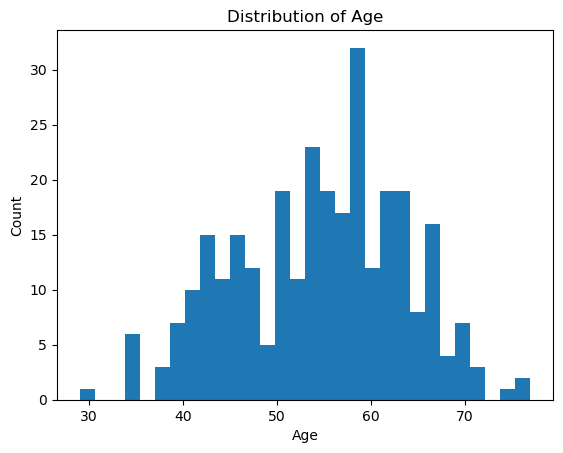

In [8]:
import matplotlib.pyplot as plt

plt.hist(heart_data['age'], bins=30)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

### sex: sex (1 = male; 0 = female)

In [9]:
heart_data['sex'].value_counts()

1    201
0     96
Name: sex, dtype: int64

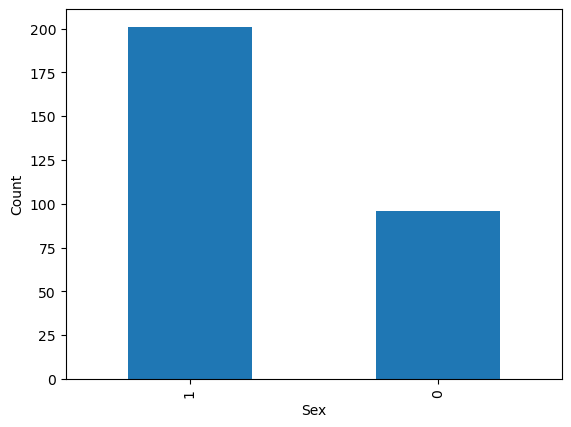

In [10]:
sex_counts = heart_data['sex'].value_counts()
sex_counts.plot.bar()
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

### condition: 0 = no disease, 1 = disease

In [11]:
heart_data['condition'].value_counts()

0    160
1    137
Name: condition, dtype: int64

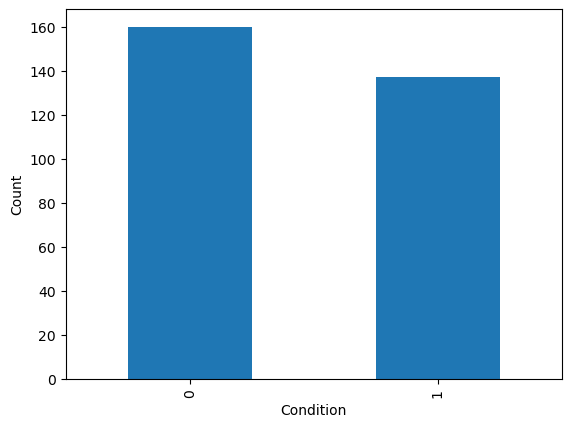

In [12]:
condition_counts = heart_data['condition'].value_counts()
condition_counts.plot.bar()
plt.xlabel("Condition")
plt.ylabel("Count")
plt.show()

# checking the relationship between the "age" and "sex"

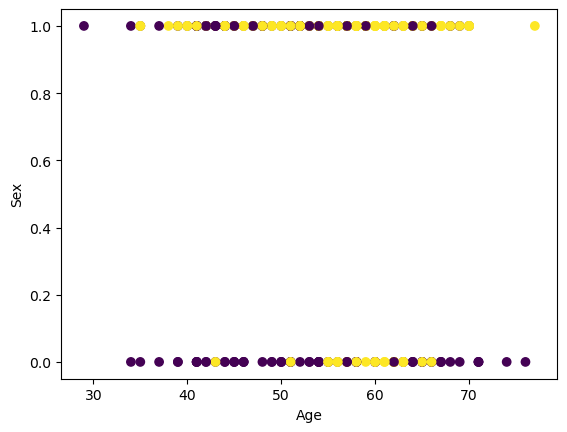

In [13]:
# create a scatter plot of age against sex
plt.scatter(heart_data['age'], heart_data['sex'], c=heart_data['condition'])

# set the x-axis and y-axis labels
plt.xlabel('Age')
plt.ylabel('Sex')

# show the plot
plt.show()

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Preprocess the data and scaling features.

In [15]:
# Preprocess the data

y = heart_data.condition

features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

X = heart_data[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

# Train a Random Forest classifier

In [16]:
# Train a Random Forest classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

# Evaluate the model on the testing set

In [17]:
# Evaluate the model on the testing set
y_pred = rfc.predict(X_test_scaled)
print("Accuracy score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score: 0.7
              precision    recall  f1-score   support

           0       0.73      0.69      0.71        32
           1       0.67      0.71      0.69        28

    accuracy                           0.70        60
   macro avg       0.70      0.70      0.70        60
weighted avg       0.70      0.70      0.70        60



# Accuracy score: 0.7

# Tune the hyperparameters using cross-validation

In [18]:
# Tune the hyperparameters using cross-validation
param_grid = {'n_estimators': [50, 100, 150, 200], 
              'max_depth': [2, 4, 6, 8, 10],
              'min_samples_split': [2, 4, 6, 8, 10]}

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 50}


## Best hyperparameters: {'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 50}

# Train a new Random Forest classifier with the best hyperparameters

In [19]:
# Train a new Random Forest classifier with the best hyperparameters
rfc_tuned = RandomForestClassifier(random_state=42, **best_params)
rfc_tuned.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=4, n_estimators=50, random_state=42)

In [20]:
y_pred = rfc_tuned.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7333333333333333


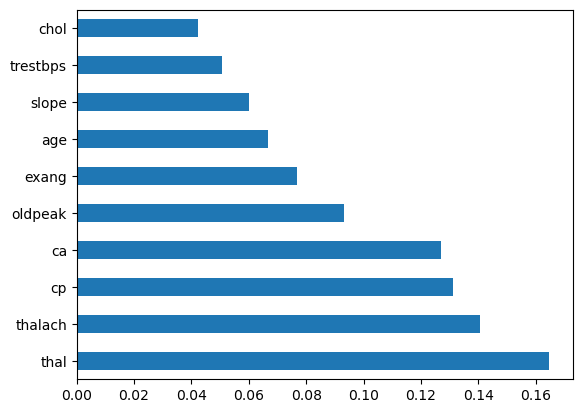

In [21]:
import matplotlib.pyplot as plt

# Visualize the important features
feat_importances = pd.Series(rfc_tuned.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [22]:
# End